In [1]:
from pointwise_min import construct_df_for_eq_div_fpr
from pointwise_min import get_fpr_eq_div
import matplotlib.pylab as plt 
from responsibly.dataset import build_FICO_dataset

unable to import 'smart_open.gcs', disabling that module
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.


In [3]:
eq_fpr_df = construct_df_for_eq_div_fpr()
print(eq_fpr_df)

     Asian_tpr Asian_threshold Black_tpr Black_threshold Hispanic_tpr  \
0.00         0             101         0             101            0   
0.01  0.208004         83.5315   0.28234          59.954     0.244266   
0.02  0.305074         76.7585  0.407198         49.5555     0.340156   
0.03  0.366317         72.2048   0.48769         44.3485     0.413364   
0.04  0.415311         67.8275  0.546138         41.2037      0.47262   
...        ...             ...       ...             ...          ...   
0.95  0.999261         1.88255  0.998966         1.26112     0.999245   
0.96  0.999414          1.4599  0.999205         1.18002     0.999406   
0.97  0.999562          1.3232  0.999445         1.09892     0.999566   
0.98   0.99971         1.18649  0.999684         1.01782     0.999727   
0.99  0.999857         1.04978  0.999856        0.767093     0.999884   

     Hispanic_threshold White_tpr White_threshold  
0.00                101         0             101  
0.01            70.

In [4]:
drop_thresholds_df = eq_fpr_df.drop(columns = ['Asian_threshold','Black_threshold', 'Hispanic_threshold','White_threshold'])
print(drop_thresholds_df)

     Asian_tpr Black_tpr Hispanic_tpr White_tpr
0.00         0         0            0         0
0.01  0.208004   0.28234     0.244266  0.241511
0.02  0.305074  0.407198     0.340156   0.41111
0.03  0.366317   0.48769     0.413364  0.515909
0.04  0.415311  0.546138      0.47262  0.587638
...        ...       ...          ...       ...
0.95  0.999261  0.998966     0.999245  0.999584
0.96  0.999414  0.999205     0.999406  0.999677
0.97  0.999562  0.999445     0.999566  0.999763
0.98   0.99971  0.999684     0.999727  0.999849
0.99  0.999857  0.999856     0.999884  0.999934

[100 rows x 4 columns]


In [11]:
pointwise_min_df = drop_thresholds_df.min(axis=1)
print(pointwise_min_df)
eq_fpr = list(get_fpr_eq_div())
min_tpr = list(pointwise_min_df)

FICO = build_FICO_dataset()

#list of attributes are Asian, Hispanic, Black, White 
data_fpr_Asian = FICO['fpr']['Asian']
data_tpr_Asian = FICO['tpr']['Asian']

data_fpr_Hispanic = FICO['fpr']['Hispanic']
data_tpr_Hispanic = FICO['tpr']['Hispanic']

data_fpr_Black = FICO['fpr']['Black']
data_tpr_Black = FICO['tpr']['Black']

data_fpr_White = FICO['fpr']['White']
data_tpr_White = FICO['tpr']['White']

print(data_fpr_Asian)
print(data_tpr_Asian)


0.00    0.000000
0.01    0.208004
0.02    0.305074
0.03    0.366317
0.04    0.415311
          ...   
0.95    0.998966
0.96    0.999205
0.97    0.999445
0.98    0.999684
0.99    0.999856
Length: 100, dtype: float64
Score
0.0      1.000000
0.5      1.000000
1.0      0.993641
1.5      0.957067
2.0      0.947830
           ...   
98.5     0.000452
99.0     0.000164
99.5     0.000045
100.0    0.000025
101.0    0.000000
Name: Asian, Length: 199, dtype: float64
Score
0.0      1.000000
0.5      1.000000
1.0      0.999911
1.5      0.999371
2.0      0.999227
           ...   
98.5     0.013029
99.0     0.004794
99.5     0.001352
100.0    0.000738
101.0    0.000000
Name: Asian, Length: 199, dtype: float64


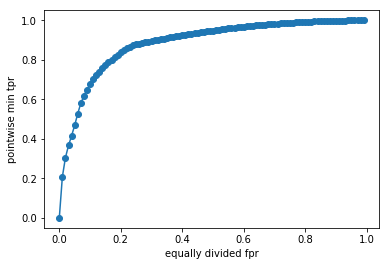

In [9]:
plt.plot(eq_fpr,min_tpr,'-o')
plt.xlabel('equally divided fpr')
plt.ylabel('pointwise min tpr')
plt.show()

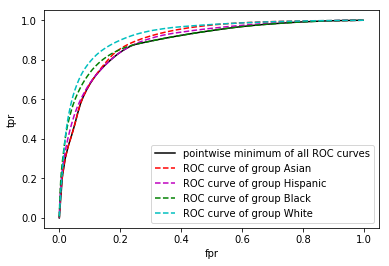

In [20]:
plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.plot(data_fpr_Asian, data_tpr_Asian,'--r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'--g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,'--c',label='ROC curve of group White')
plt.legend()

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()